In [1]:
import pandas as pd

# Define the path to your CSV file
file_path = 'gsdata.csv'  # Ensure this points to your file

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Display the feature names in the dataset
print("Features in the dataset:", data.columns.tolist())

# Display the first few rows to get a sense of the data
print(data.head(), data.shape)


Features in the dataset: ['x_mean', 'x_std_dev', 'x_variance', 'x_icv', 'x_median', 'x_minimum', 'x_maximum', 'x_skewness', 'x_kurtosis', 'x_iqr', 'x_peak_to_peak', 'x_entropy', 'y_mean', 'y_std_dev', 'y_variance', 'y_icv', 'y_median', 'y_minimum', 'y_maximum', 'y_skewness', 'y_kurtosis', 'y_iqr', 'y_peak_to_peak', 'y_entropy', 'z_mean', 'z_std_dev', 'z_variance', 'z_icv', 'z_median', 'z_minimum', 'z_maximum', 'z_skewness', 'z_kurtosis', 'z_iqr', 'z_peak_to_peak', 'z_entropy', 'correlation_x_y', 'correlation_x_z', 'correlation_y_z', 'sma', 'svm', 'average_svm', 'pitch', 'roll', 'inclination', 'integral', 'squared_integral', 'energy', 'combined_entropy', 'x_spectral_energy', 'x_dominant_frequency', 'x_max_psd', 'x_spectral_entropy', 'x_peak_frequency', 'x_spectral_centroid', 'x_spectral_spread', 'x_spectral_skewness', 'x_spectral_kurtosis', 'x_spectral_flatness', 'x_spectral_slope', 'x_spectral_rolloff', 'y_spectral_energy', 'y_dominant_frequency', 'y_max_psd', 'y_spectral_entropy', 'y_

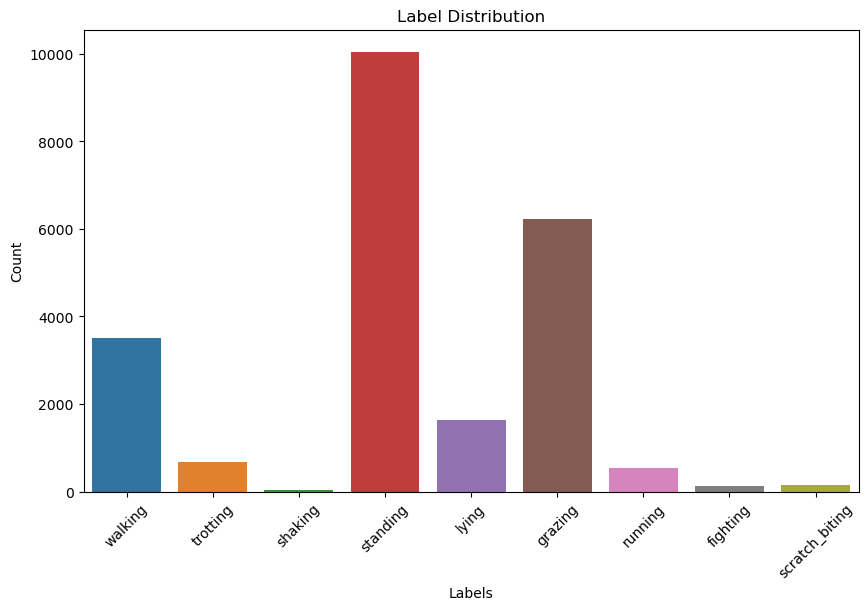

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the label distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=data['label'])  # Explicitly specifying the 'x' parameter
plt.title("Label Distribution")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [3]:
# Labels to remove
labels_to_remove = ['shaking', 'fighting', 'scratch_biting']

# Filtering the DataFrame to keep rows where the 'Name' column is not in 'names_to_remove'
df_filtered = data[~data['label'].isin(labels_to_remove)]

In [4]:
X = df_filtered.drop('label', axis=1)
y = df_filtered['label']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
# Optional
# Uncomment to Save your datasets
# X_train.to_csv('X_train.csv', index=False)  # Set index=False to not save row indices
# X_test.to_csv('X_test.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

## Filter methods

### Information Gain

A technique used in feature selection to determine the importance of features by measuring the reduction in entropy from transforming a dataset in some way. 

In [8]:
# Importing the libraries
from sklearn.feature_selection import mutual_info_classif

# Calculate Information Gain for each feature
info_gain = mutual_info_classif(X_train, y_train)
info_gain_series = pd.Series(info_gain, index=X_train.columns)

# Sort the features by Information Gain in descending order
sorted_features = info_gain_series.sort_values(ascending = False)
print(sorted_features)

z_std_dev              0.792414
z_variance             0.792113
x_iqr                  0.753482
z_peak_to_peak         0.750024
z_iqr                  0.747041
                         ...   
y_spectral_flatness    0.070868
x_kurtosis             0.067163
y_spectral_spread      0.062532
x_skewness             0.041040
y_skewness             0.036534
Length: 85, dtype: float64


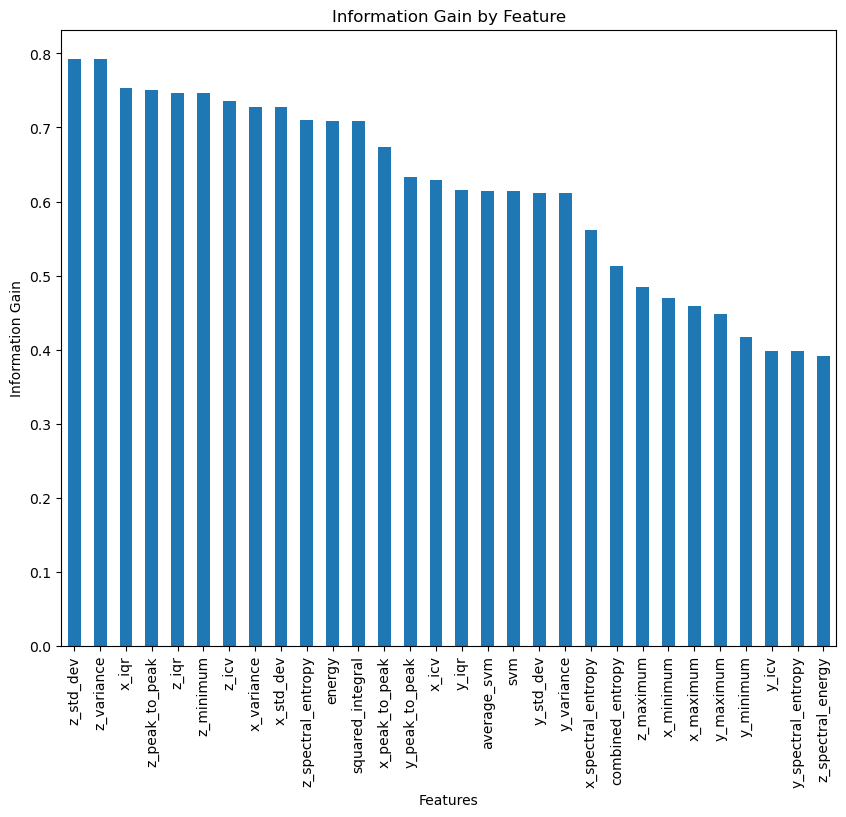

In [9]:
# Plotting the Information Gain of the top 30 features
plt.figure(figsize=(10, 8))
sorted_features.head(30).plot(kind='bar')
plt.title('Information Gain by Feature')
plt.ylabel('Information Gain')
plt.xlabel('Features')
plt.savefig('information_gain.png', dpi=300)
plt.show()

### ANOVA F-Value

Feature Scores: z_std_dev         35172.453652
z_iqr             32214.437313
svm               25555.910370
average_svm       25555.910370
z_peak_to_peak    23178.704585
                      ...     
x_entropy            66.373729
y_kurtosis           55.642534
z_kurtosis           53.889757
y_skewness           10.330706
x_skewness            9.027106
Length: 85, dtype: float64


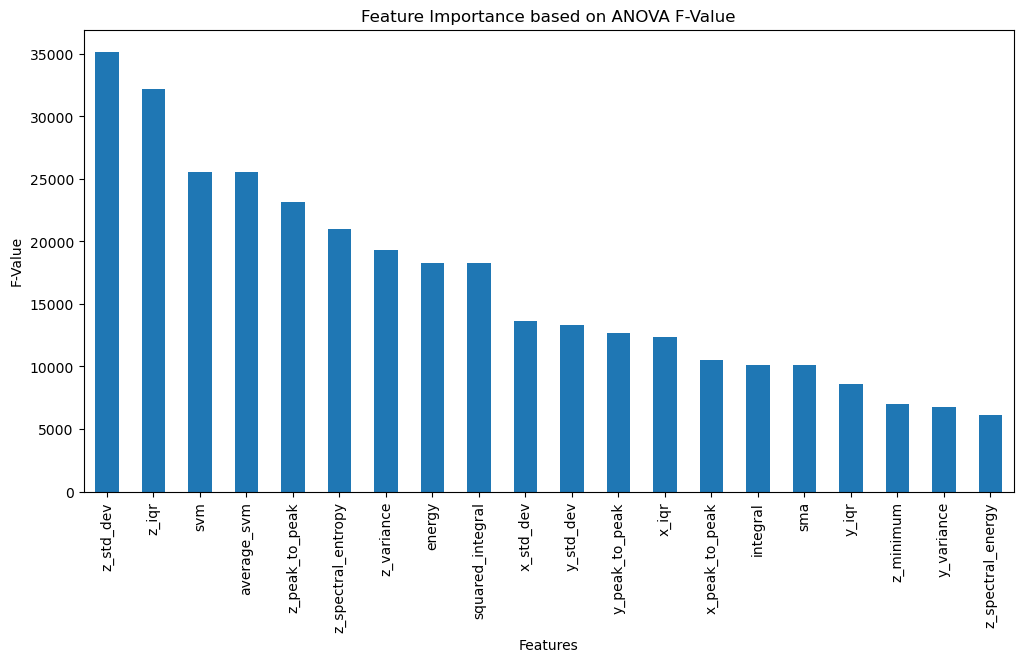

In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Applying ANOVA F-Value
selector = SelectKBest(score_func=f_classif, k='all')
X_train_selected = selector.fit_transform(X_train, y_train)

# Getting scores for each feature
scores = selector.scores_

# Creating a Series for the scores
feature_scores = pd.Series(scores, index=X_train.columns)

# Sorting features based on scores
sorted_features = feature_scores.sort_values(ascending=False)

# Displaying the sorted features and their scores
print("Feature Scores:", sorted_features)

# Plotting feature scores
plt.figure(figsize=(12, 6))
sorted_features.head(20).plot(kind='bar')
plt.title('Feature Importance based on ANOVA F-Value')
plt.xlabel('Features')
plt.ylabel('F-Value')
plt.savefig('anova_f_value.png')
plt.show()

### Correlation Coefficient

In [11]:

# Calculating correlation matrix
corr_matrix = X_train.corr()

# Identifying highly correlated features
threshold = 0.6
highly_correlated_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]

print("Highly correlated features: ", highly_correlated_features)


Highly correlated features:  ['x_mean', 'x_std_dev', 'x_variance', 'x_icv', 'x_median', 'x_minimum', 'x_maximum', 'x_skewness', 'x_kurtosis', 'x_iqr', 'x_peak_to_peak', 'x_entropy', 'y_mean', 'y_std_dev', 'y_variance', 'y_icv', 'y_median', 'y_minimum', 'y_maximum', 'y_skewness', 'y_kurtosis', 'y_iqr', 'y_peak_to_peak', 'y_entropy', 'z_mean', 'z_std_dev', 'z_variance', 'z_icv', 'z_median', 'z_minimum', 'z_maximum', 'z_skewness', 'z_kurtosis', 'z_iqr', 'z_peak_to_peak', 'z_entropy', 'correlation_x_y', 'correlation_x_z', 'correlation_y_z', 'sma', 'svm', 'average_svm', 'pitch', 'roll', 'inclination', 'integral', 'squared_integral', 'energy', 'combined_entropy', 'x_spectral_energy', 'x_dominant_frequency', 'x_max_psd', 'x_spectral_entropy', 'x_peak_frequency', 'x_spectral_centroid', 'x_spectral_spread', 'x_spectral_skewness', 'x_spectral_kurtosis', 'x_spectral_flatness', 'x_spectral_slope', 'x_spectral_rolloff', 'y_spectral_energy', 'y_dominant_frequency', 'y_max_psd', 'y_spectral_entropy',

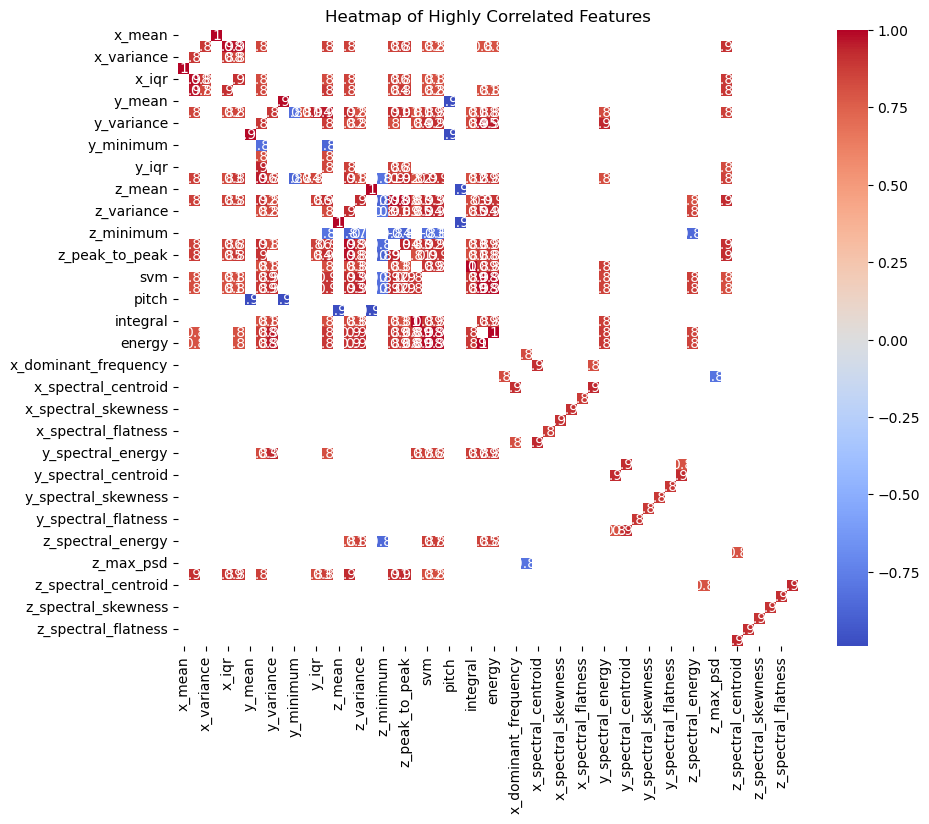

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'corr_matrix' is your correlation matrix
threshold = 0.8  # Define a threshold for high correlation

# Find features with high correlation
high_corr = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)

# Filter the correlation matrix
high_corr_matrix = corr_matrix[high_corr].dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot heatmap for highly correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Highly Correlated Features')
plt.show()


### Mean Absolute Difference (MAD)

In [13]:
# Calculate the mean for each feature
feature_means = X_train.mean()

# Calculate MAD for each feature manually
mad_values = (X_train - feature_means).abs().mean()

# Displaying the MAD values
print(mad_values)

x_mean                  4.420863
x_std_dev               0.958864
x_variance              5.853508
x_icv                  17.396949
x_median                4.388141
                         ...    
z_spectral_skewness     2.301578
z_spectral_kurtosis    48.428439
z_spectral_flatness     0.019177
z_spectral_slope        0.498021
z_spectral_rolloff      3.398551
Length: 85, dtype: float64


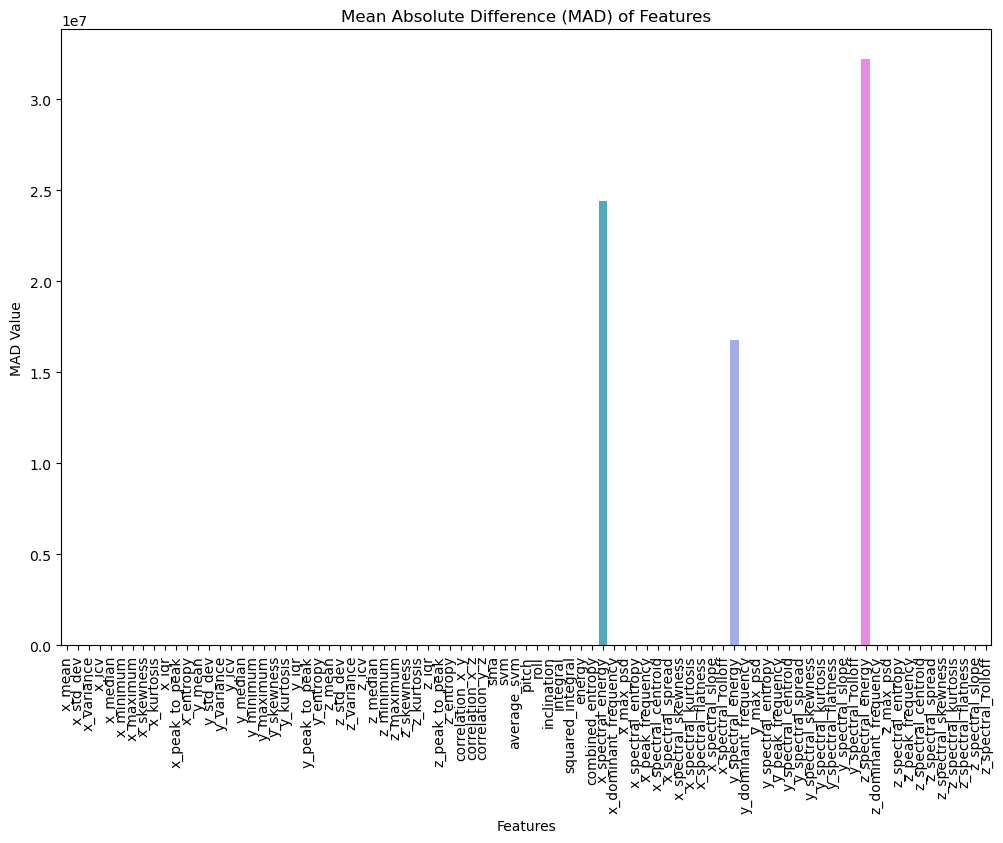

In [30]:
# Create a bar plot for MAD values
plt.figure(figsize=(12, 8))
sns.barplot(x=mad_values.index, y=mad_values.values)

# Adding plot title and labels
plt.title('Mean Absolute Difference (MAD) of Features')
plt.ylabel('MAD Value')
plt.xlabel('Features')

# Rotating feature names for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

### ReliefF

In [14]:
from skrebate import ReliefF

# Initialize the ReliefF algorithm
fs = ReliefF(n_neighbors=10, n_features_to_select=15)

# Fit the model and select the top features
fs.fit(X_train.values, y_train.values)
print("Feature rankings:", fs.feature_importances_)


Feature rankings: [0.11970594 0.11334356 0.04272197 0.02198701 0.11308511 0.08579027
 0.08693785 0.01012471 0.0034036  0.10791395 0.09816323 0.02045468
 0.0866519  0.09305681 0.03038847 0.01394257 0.08037388 0.0952464
 0.08227818 0.01329466 0.0041515  0.13361993 0.09338397 0.0329293
 0.05609261 0.15209289 0.07145173 0.03275131 0.06208458 0.15597941
 0.07525171 0.01609798 0.00335786 0.14399592 0.12305365 0.02447651
 0.06690657 0.13428536 0.09333093 0.08370244 0.08518575 0.08518575
 0.06710184 0.17116807 0.08544848 0.08370244 0.05225712 0.05225712
 0.19849744 0.04369057 0.02729644 0.09491864 0.23210205 0.0371116
 0.03022751 0.02653057 0.02890526 0.00886006 0.00625073 0.04544053
 0.02621902 0.0325858  0.0266321  0.05545081 0.21669959 0.05882392
 0.03208111 0.02456781 0.02651925 0.00834243 0.00958576 0.04281436
 0.02761093 0.0518334  0.02669369 0.03339379 0.19169111 0.0433112
 0.02800315 0.03030489 0.02486188 0.00790623 0.01223105 0.06133101
 0.02237002]


In [19]:
# Feature importances from ReliefF
importances = fs.feature_importances_

# Creating a DataFrame for visualization
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["Importance"])

# Sort the DataFrame by importance
sorted_features = feature_importances.sort_values(by="Importance", ascending=False)

# Get the top 'n_features_to_select' features
n_features_to_select = 15
top_features = sorted_features.head(n_features_to_select)

print("Top Features Selected by ReliefF:")
print(top_features)

Top Features Selected by ReliefF:
                    Importance
x_spectral_entropy    0.232102
y_spectral_entropy    0.216700
combined_entropy      0.198497
z_spectral_entropy    0.191691
roll                  0.171168
z_minimum             0.155979
z_std_dev             0.152093
z_iqr                 0.143996
correlation_x_z       0.134285
y_iqr                 0.133620
z_peak_to_peak        0.123054
x_mean                0.119706
x_std_dev             0.113344
x_median              0.113085
x_iqr                 0.107914


### Variance threshold

In [20]:
from sklearn.feature_selection import VarianceThreshold

# Setting up the Variance Threshold
selector = VarianceThreshold(threshold=0.2)

# Fitting and transforming the data
X_selected = selector.fit_transform(X_train)

# Getting the mask of the features selected
features_mask = selector.get_support(indices=True)

# Mapping mask to get feature names
selected_features = X_train.columns[features_mask]

print("Selected Features Based on Variance Threshold:")
print(selected_features, selected_features.shape)

Selected Features Based on Variance Threshold:
Index(['x_mean', 'x_std_dev', 'x_variance', 'x_icv', 'x_median', 'x_minimum',
       'x_maximum', 'x_skewness', 'x_kurtosis', 'x_iqr', 'x_peak_to_peak',
       'y_mean', 'y_std_dev', 'y_variance', 'y_icv', 'y_median', 'y_minimum',
       'y_maximum', 'y_skewness', 'y_kurtosis', 'y_iqr', 'y_peak_to_peak',
       'z_mean', 'z_std_dev', 'z_variance', 'z_icv', 'z_median', 'z_minimum',
       'z_maximum', 'z_skewness', 'z_kurtosis', 'z_iqr', 'z_peak_to_peak',
       'sma', 'svm', 'average_svm', 'roll', 'inclination', 'integral',
       'squared_integral', 'energy', 'combined_entropy', 'x_spectral_energy',
       'x_dominant_frequency', 'x_max_psd', 'x_spectral_entropy',
       'x_peak_frequency', 'x_spectral_centroid', 'x_spectral_spread',
       'x_spectral_skewness', 'x_spectral_kurtosis', 'x_spectral_slope',
       'x_spectral_rolloff', 'y_spectral_energy', 'y_dominant_frequency',
       'y_max_psd', 'y_spectral_entropy', 'y_peak_frequency',

## Wrapper methods


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Feature Reduction: Select top K features using ANOVA F-Value
selector = SelectKBest(f_classif, k=30)  # Adjust 'k' as needed
selector.fit(X_train, y_train)

# Get the boolean mask of the selected features
selected_features_mask = selector.get_support()

# Select columns from the original DataFrame
X_reduced = X_train.loc[:, selected_features_mask]

# Dataset Reduction: Random sampling (e.g., 10% of the data)
X_sampled, _, y_sampled, _ = train_test_split(X_reduced, y_train, test_size=0.8, random_state=42, stratify=y_train)

# X_sampled now contains the selected feature names


In [47]:
X_sampled

,x_std_dev,x_variance,x_minimum,x_maximum,x_iqr,x_peak_to_peak,y_std_dev,y_variance,y_minimum,y_maximum,...,integral,squared_integral,energy,combined_entropy,x_spectral_entropy,y_spectral_energy,y_spectral_entropy,z_spectral_energy,z_spectral_entropy,z_spectral_slope
1818,0.228400,0.052167,2.801220,3.85706,0.390250,1.055840,0.225359,0.050787,2.96642,3.900150,...,83.089092,580.028653,116005.73060,0.945453,0.062812,1.223754e+07,0.058223,9.510435e+07,0.001539,-1.839884
16373,1.344172,1.806799,-4.805160,3.25851,0.887051,8.063670,1.513696,2.291277,-5.19063,5.219360,...,67.273984,516.805684,103361.13680,2.845975,4.958424,6.742925e+06,2.856869,9.669051e+07,0.298276,-2.383771
15018,0.996029,0.992074,-0.610521,6.80193,0.539290,7.412451,2.242278,5.027809,-10.16820,4.709390,...,71.535297,535.790396,107158.07920,2.578652,2.722339,1.004044e+07,3.571762,9.623243e+07,0.153215,-1.833243
9676,0.918507,0.843655,3.304000,12.85690,0.854135,9.552900,1.630472,2.658439,-2.41575,4.005500,...,78.224243,507.059906,101411.98120,2.865559,0.214667,3.024693e+06,3.504499,4.261559e+07,0.161398,-2.936641
18434,1.988153,3.952751,-3.833120,6.06212,2.652773,9.895240,1.852222,3.430727,-9.03093,-0.193930,...,76.043353,614.006457,122801.29130,4.343024,4.836274,1.829157e+07,1.810883,1.021348e+08,1.069155,-1.990188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15743,0.309787,0.095968,0.974440,2.64799,0.345360,1.673550,0.376079,0.141435,-1.14922,1.762130,...,61.552193,513.338244,102667.64880,2.190655,0.360810,2.402620e+05,4.668584,1.013853e+08,0.011785,-2.543005
19418,0.210601,0.044353,3.655950,5.23851,0.213680,1.582560,0.163110,0.026605,4.97515,6.155490,...,85.584378,494.217518,98843.50351,1.790030,0.040848,3.348993e+07,0.014947,4.872381e+07,0.009147,-2.063338
11755,0.648806,0.420949,-6.938400,-3.57933,0.328010,3.359070,0.256343,0.065712,-2.81558,-0.349553,...,78.266071,510.036720,102007.34400,2.604543,0.140476,2.319048e+06,0.372181,6.227141e+07,0.059253,-1.812981
20827,0.094345,0.008901,3.414130,3.97198,0.110730,0.557850,0.169500,0.028730,2.18591,3.062180,...,76.658147,489.371144,97874.22880,1.584814,0.011272,6.866179e+06,0.062535,7.844142e+07,0.002384,-1.770984


### Forward Selection

In [64]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Forward Selection
sfs = SFS(clf,
          k_features=10,  # Number of features to select
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=2)

# Fit SFS to the training data
sfs = sfs.fit(X_sampled, y_sampled)

# Get the selected feature indices
selected_features_indices = sfs.k_feature_idx_

# Get the names of the selected features
selected_feature_names = X_sampled.columns[list(selected_features_indices)]
print("Selected features:", selected_feature_names)

Selected features: Index(['x_maximum', 'y_minimum', 'y_maximum', 'z_std_dev', 'z_minimum',
       'z_iqr', 'svm', 'squared_integral', 'combined_entropy',
       'x_spectral_entropy'],
      dtype='object')


### Backward Elimination

In [66]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Backward Elimination
sfs = SFS(clf,
          k_features=10,  # Number of features to select
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=2)

# Fit SFS to the training data
sfs = sfs.fit(X_sampled, y_sampled)

# Get the selected feature indices
selected_features = sfs.k_feature_idx_
print("Selected features:", selected_features)

# Get the names of the selected features
selected_feature_names = X_sampled.columns[list(selected_features)]
print("Selected features:", selected_feature_names)

Selected features: (2, 8, 9, 14, 18, 19, 21, 23, 24, 27)
Selected features: Index(['x_minimum', 'y_minimum', 'y_maximum', 'z_minimum', 'svm',
       'average_svm', 'squared_integral', 'combined_entropy',
       'x_spectral_entropy', 'z_spectral_energy'],
      dtype='object')


### Recursive Feature Elimination

In [67]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Initialize RFE with the random forest classifier
selector = RFE(clf, n_features_to_select=10, step=1)

# Fit RFE to the training data
selector = selector.fit(X_sampled, y_sampled)

# Get the selected feature indices and print them
selected_features = selector.get_support(indices=True)
print("Selected features:", selected_features)



Selected features: [ 2  4 12 13 15 16 21 22 27 28]


### Exhaustive Feature Selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are the training data and labels
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

efs = EFS(clf,
          min_features=1,
          max_features=3,
          scoring='accuracy',
          print_progress=True,
          cv=2)

efs = efs.fit(X_sampled, y_sampled)

# Best feature indices and corresponding score
print('Best features:', efs.best_idx_)
print('Best score:', efs.best_score_)


## Embedded Methods

### L1 Regularization (Lasso)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical form
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Standardizing the features and creating logistic regression with L1 regularization
scaler = StandardScaler()
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear', C=10, random_state=42, max_iter=1000)

# Using a pipeline
lasso_pipeline = make_pipeline(scaler, lasso_clf)

# Fit the model
lasso_pipeline.fit(X_train, y_train_encoded)

# Feature selection using SelectFromModel
model = SelectFromModel(lasso_pipeline.named_steps['logisticregression'], prefit=True)
X_train_lasso = model.transform(X_train)
X_test_lasso = model.transform(X_test)

# Extract the indices of the selected features
selected_feature_idx = model.get_support(indices=True)

# Get the feature names using the indices
selected_features = X_train.columns[selected_feature_idx]
print("Selected Features with Lasso: ", selected_features)


Selected Features with Lasso:  Index(['x_mean', 'x_std_dev', 'x_variance', 'x_icv', 'x_median', 'x_minimum',
       'x_maximum', 'x_skewness', 'x_kurtosis', 'x_iqr', 'x_peak_to_peak',
       'x_entropy', 'y_mean', 'y_std_dev', 'y_variance', 'y_icv', 'y_median',
       'y_minimum', 'y_maximum', 'y_skewness', 'y_kurtosis', 'y_iqr',
       'y_peak_to_peak', 'y_entropy', 'z_mean', 'z_std_dev', 'z_variance',
       'z_icv', 'z_median', 'z_minimum', 'z_maximum', 'z_skewness',
       'z_kurtosis', 'z_iqr', 'z_peak_to_peak', 'z_entropy', 'correlation_x_y',
       'correlation_x_z', 'correlation_y_z', 'sma', 'svm', 'average_svm',
       'pitch', 'roll', 'inclination', 'integral', 'squared_integral',
       'energy', 'combined_entropy', 'x_spectral_energy',
       'x_dominant_frequency', 'x_max_psd', 'x_spectral_entropy',
       'x_peak_frequency', 'x_spectral_centroid', 'x_spectral_spread',
       'x_spectral_skewness', 'x_spectral_kurtosis', 'x_spectral_flatness',
       'x_spectral_slope', 'x

C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### L2 Regularization (Ridge Regression)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardizing the features and creating Ridge regression
scaler = StandardScaler()
ridge = Ridge(alpha=1.0, random_state=42)

# Using a pipeline
ridge_pipeline = make_pipeline(scaler, ridge)

# Fit the model
ridge_pipeline.fit(X_train, y_train_encoded)

# Feature selection using SelectFromModel
# Note: Adjust the threshold as needed
model = SelectFromModel(ridge_pipeline.named_steps['ridge'], prefit=True, threshold=0.1)
X_train_ridge = model.transform(X_train)
X_test_ridge = model.transform(X_test)

# Extract the indices of the selected features
selected_feature_idx = model.get_support(indices=True)

# Get the feature names using the indices
selected_features = X_train.columns[selected_feature_idx]
print("Selected Features with Ridge: ", selected_features)


Selected Features with Ridge:  Index(['x_mean', 'x_std_dev', 'x_variance', 'x_icv', 'x_median', 'x_maximum',
       'x_iqr', 'x_peak_to_peak', 'y_mean', 'y_std_dev', 'y_variance',
       'y_median', 'y_minimum', 'y_iqr', 'y_peak_to_peak', 'z_mean',
       'z_std_dev', 'z_variance', 'z_icv', 'z_median', 'z_minimum',
       'z_maximum', 'z_iqr', 'z_peak_to_peak', 'correlation_x_z',
       'correlation_y_z', 'sma', 'svm', 'average_svm', 'pitch', 'roll',
       'inclination', 'integral', 'squared_integral', 'energy',
       'combined_entropy', 'x_spectral_energy', 'x_dominant_frequency',
       'x_max_psd', 'x_spectral_entropy', 'x_spectral_centroid',
       'x_spectral_spread', 'x_spectral_skewness', 'x_spectral_kurtosis',
       'x_spectral_flatness', 'x_spectral_rolloff', 'y_spectral_energy',
       'y_dominant_frequency', 'y_max_psd', 'y_spectral_entropy',
       'y_spectral_centroid', 'y_spectral_spread', 'y_spectral_flatness',
       'y_spectral_slope', 'y_spectral_rolloff', 'z_max_p

C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Elastic Net

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

# Standardizing the features and creating Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=5000, random_state=42)

# Using a pipeline
elastic_net_pipeline = make_pipeline(scaler, elastic_net)

# Fit the model
elastic_net_pipeline.fit(X_train, y_train_encoded)

# Feature selection using SelectFromModel
model_elastic = SelectFromModel(elastic_net_pipeline.named_steps['elasticnet'], prefit=True)
X_train_elastic = model_elastic.transform(X_train)
X_test_elastic = model_elastic.transform(X_test)

# Extract the indices of the selected features
selected_feature_idx_elastic = model_elastic.get_support(indices=True)

# Get the feature names using the indices
selected_features_elastic = X_train.columns[selected_feature_idx_elastic]
print("Selected Features with Elastic Net: ", selected_features_elastic)

Selected Features with Elastic Net:  Index(['x_mean', 'x_std_dev', 'x_variance', 'x_icv', 'x_median', 'x_minimum',
       'x_maximum', 'x_skewness', 'x_kurtosis', 'x_iqr', 'x_peak_to_peak',
       'x_entropy', 'y_mean', 'y_std_dev', 'y_variance', 'y_icv', 'y_median',
       'y_minimum', 'y_maximum', 'y_skewness', 'y_kurtosis', 'y_iqr',
       'y_peak_to_peak', 'y_entropy', 'z_mean', 'z_std_dev', 'z_variance',
       'z_icv', 'z_median', 'z_minimum', 'z_maximum', 'z_skewness',
       'z_kurtosis', 'z_iqr', 'z_peak_to_peak', 'z_entropy', 'correlation_x_y',
       'correlation_x_z', 'correlation_y_z', 'sma', 'svm', 'average_svm',
       'pitch', 'roll', 'inclination', 'integral', 'squared_integral',
       'energy', 'combined_entropy', 'x_spectral_energy',
       'x_dominant_frequency', 'x_max_psd', 'x_spectral_entropy',
       'x_peak_frequency', 'x_spectral_centroid', 'x_spectral_spread',
       'x_spectral_skewness', 'x_spectral_kurtosis', 'x_spectral_flatness',
       'x_spectral_slop

C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Feature selection using Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the model
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X_train.columns[indices[f]]}")

# Select features based on importance (you can set a threshold)
#  e.g., the median of the importances
threshold = np.median(importances)
selected_features_rf = X_train.columns[importances > threshold]  # Define your threshold
print("Selected Features:", selected_features_rf)

Feature ranking:
1. feature 25 (0.06234890779579151) - z_std_dev
2. feature 26 (0.053201898003030934) - z_variance
3. feature 76 (0.049278559700704626) - z_spectral_entropy
4. feature 33 (0.046869597399878594) - z_iqr
5. feature 34 (0.0446782728263795) - z_peak_to_peak
6. feature 9 (0.03771998664595951) - x_iqr
7. feature 1 (0.034228447004759945) - x_std_dev
8. feature 2 (0.02851057719975903) - x_variance
9. feature 46 (0.025169194211047435) - squared_integral
10. feature 47 (0.024303517250432977) - energy
11. feature 52 (0.022307096006801485) - x_spectral_entropy
12. feature 27 (0.017337963826284265) - z_icv
13. feature 40 (0.01725562073501412) - svm
14. feature 21 (0.016861741695488524) - y_iqr
15. feature 74 (0.01656153639768411) - z_dominant_frequency
16. feature 41 (0.01637228459349276) - average_svm
17. feature 4 (0.0160397954709371) - x_median
18. feature 0 (0.01572050865423782) - x_mean
19. feature 39 (0.014569667154956703) - sma
20. feature 78 (0.013068135820839818) - z_spectr

### Feature selection with Decision Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

# Get the feature importances
importances = dt.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X_train.columns[indices[f]]}")

# Define a threshold for selecting features, e.g., the median of the importances
threshold = np.median(importances)

# Select features based on the threshold
selected_features_dt = X_train.columns[importances >= threshold]
print("Selected Features:", selected_features_dt)

Feature ranking:
1. feature 34 (0.29238940619406806) - z_peak_to_peak
2. feature 76 (0.12066714191456807) - z_spectral_entropy
3. feature 46 (0.07545174369729989) - squared_integral
4. feature 0 (0.05463551817303122) - x_mean
5. feature 33 (0.04014654427728437) - z_iqr
6. feature 45 (0.034544736442920124) - integral
7. feature 9 (0.033134187095444835) - x_iqr
8. feature 18 (0.021836218927982643) - y_maximum
9. feature 66 (0.02177173741837548) - y_spectral_centroid
10. feature 83 (0.019971204252051913) - z_spectral_slope
11. feature 3 (0.01572852033109518) - x_icv
12. feature 74 (0.015110293889308226) - z_dominant_frequency
13. feature 72 (0.011089702032593662) - y_spectral_rolloff
14. feature 5 (0.00992010959866617) - x_minimum
15. feature 40 (0.009691445861730067) - svm
16. feature 42 (0.00921685266363188) - pitch
17. feature 53 (0.009134803807657873) - x_peak_frequency
18. feature 54 (0.008303463844395962) - x_spectral_centroid
19. feature 47 (0.007735983378520613) - energy
20. featu

### Gradient Boosting Machines

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=42)

# Fit the model
gbm.fit(X_train, y_train)

# Get the feature importances
importances = gbm.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X_train.columns[indices[f]]}")

# Define a threshold for selecting features
threshold = np.median(importances)

# Select features based on the threshold
selected_features_gbm = X_train.columns[importances >= threshold]
print("Selected Features:", selected_features_gbm)


Feature ranking:
1. feature 3 (0.9197759500989812) - x_icv
2. feature 34 (0.03264043330067379) - z_peak_to_peak
3. feature 21 (0.021223003505511446) - y_iqr
4. feature 9 (0.011673534393697005) - x_iqr
5. feature 39 (0.003714248315399095) - sma
6. feature 46 (0.0029734328522588293) - squared_integral
7. feature 76 (0.0012643978589418077) - z_spectral_entropy
8. feature 83 (0.0009940857792194264) - z_spectral_slope
9. feature 64 (0.0007851447653038553) - y_spectral_entropy
10. feature 53 (0.0006200042062693557) - x_peak_frequency
11. feature 66 (0.0005642303864064478) - y_spectral_centroid
12. feature 78 (0.0004434326251767031) - z_spectral_centroid
13. feature 75 (0.00031253513254504006) - z_max_psd
14. feature 31 (0.00025138206985529687) - z_skewness
15. feature 57 (0.0002324457922933722) - x_spectral_kurtosis
16. feature 45 (0.0002176323603179888) - integral
17. feature 71 (0.0001937815835742339) - y_spectral_slope
18. feature 0 (0.0001573245607581647) - x_mean
19. feature 48 (0.00013

### XGBoost

In [28]:
!pip install xgboost

                                              0.0/99.8 MB ? eta -:--:--
                                              0.0/99.8 MB ? eta -:--:--
                                              0.1/99.8 MB 1.3 MB/s eta 0:01:17
                                              0.2/99.8 MB 1.5 MB/s eta 0:01:08
                                              0.3/99.8 MB 1.6 MB/s eta 0:01:03
                                              0.5/99.8 MB 2.2 MB/s eta 0:00:45
                                              0.9/99.8 MB 3.3 MB/s eta 0:00:31
                                              1.2/99.8 MB 3.6 MB/s eta 0:00:28
                                              2.1/99.8 MB 5.5 MB/s eta 0:00:18
     -                                        3.0/99.8 MB 7.0 MB/s eta 0:00:14
     -                                        4.2/99.8 MB 9.0 MB/s eta 0:00:11
     --                                       5.4/99.8 MB 10.5 MB/s eta 0:00:09
     --                                       6.7/99.8 MB 11.9 MB

In [34]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softprob',    
                            num_class=5, random_state=42)


# Fit the model
xgb_clf.fit(X_train, y_train_encoded)

# Feature importance based feature selection
model = SelectFromModel(xgb_clf, prefit=True)
X_train_xgb = model.transform(X_train)
X_test_xgb = model.transform(X_test)

# Extract the indices of the selected features
selected_feature_idx = model.get_support(indices=True)

# Get the feature names using the indices
selected_features = X_train.columns[selected_feature_idx]
print("Selected Features with XGBoost: ", selected_features)


Selected Features with XGBoost:  Index(['x_mean', 'x_icv', 'x_iqr', 'z_std_dev', 'z_iqr', 'z_peak_to_peak',
       'sma', 'pitch', 'squared_integral', 'x_spectral_energy',
       'x_peak_frequency', 'z_dominant_frequency', 'z_spectral_entropy',
       'z_peak_frequency'],
      dtype='object')


C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\nklea\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### A simple Hybrid method

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, VarianceThreshold

# Step 1: Filter Method - Variance Threshold
# Removing features with low variance
selector = VarianceThreshold(threshold=0.2)  # Adjust threshold as needed
X_reduced = selector.fit_transform(X_train)

# Step 2: Wrapper Method - Feature selection using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_reduced, y_train_encoded)

# Selecting features based on importance
sfm = SelectFromModel(rf, threshold='median')  # Adjust threshold as needed
X_transformed = sfm.fit_transform(X_reduced, y_train_encoded)

# Getting the selected feature names
selected_features = X_train.columns[sfm.get_support(indices=True)]
print("Selected Features: ", selected_features)

Selected Features:  Index(['x_mean', 'x_std_dev', 'x_variance', 'x_median', 'x_minimum',
       'x_maximum', 'x_iqr', 'x_peak_to_peak', 'x_entropy', 'y_mean', 'y_icv',
       'y_minimum', 'y_kurtosis', 'y_iqr', 'y_entropy', 'z_mean', 'z_std_dev',
       'z_icv', 'z_skewness', 'z_kurtosis', 'z_iqr', 'z_peak_to_peak',
       'z_entropy', 'correlation_y_z', 'sma', 'svm', 'average_svm', 'pitch',
       'inclination', 'integral', 'x_spectral_skewness', 'y_spectral_entropy',
       'y_peak_frequency', 'y_spectral_centroid', 'y_spectral_spread',
       'y_spectral_skewness', 'y_spectral_kurtosis', 'z_dominant_frequency'],
      dtype='object')
